# Regressão linear simples

Para poucos atributos, utilizamos inversão de matriz de delineamento que tem custo computacional alto, mas para muitos atributos, utilizamos descida do gradiente

In [19]:
!pip install plotly --upgrade

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Base preço das casas - MAE 172.604, 0.48

In [21]:
base_casas = pd.read_csv('house_prices.csv')

In [22]:
# ATUALIZAÇÃO OUT-2024: a versão atual do Pandas não está considerando o formato do dado como data, vamos remover esta coluna
base_casas.drop('date', axis=1, inplace=True)

In [23]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
base_casas.isnull().sum()

,0
id,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [25]:
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


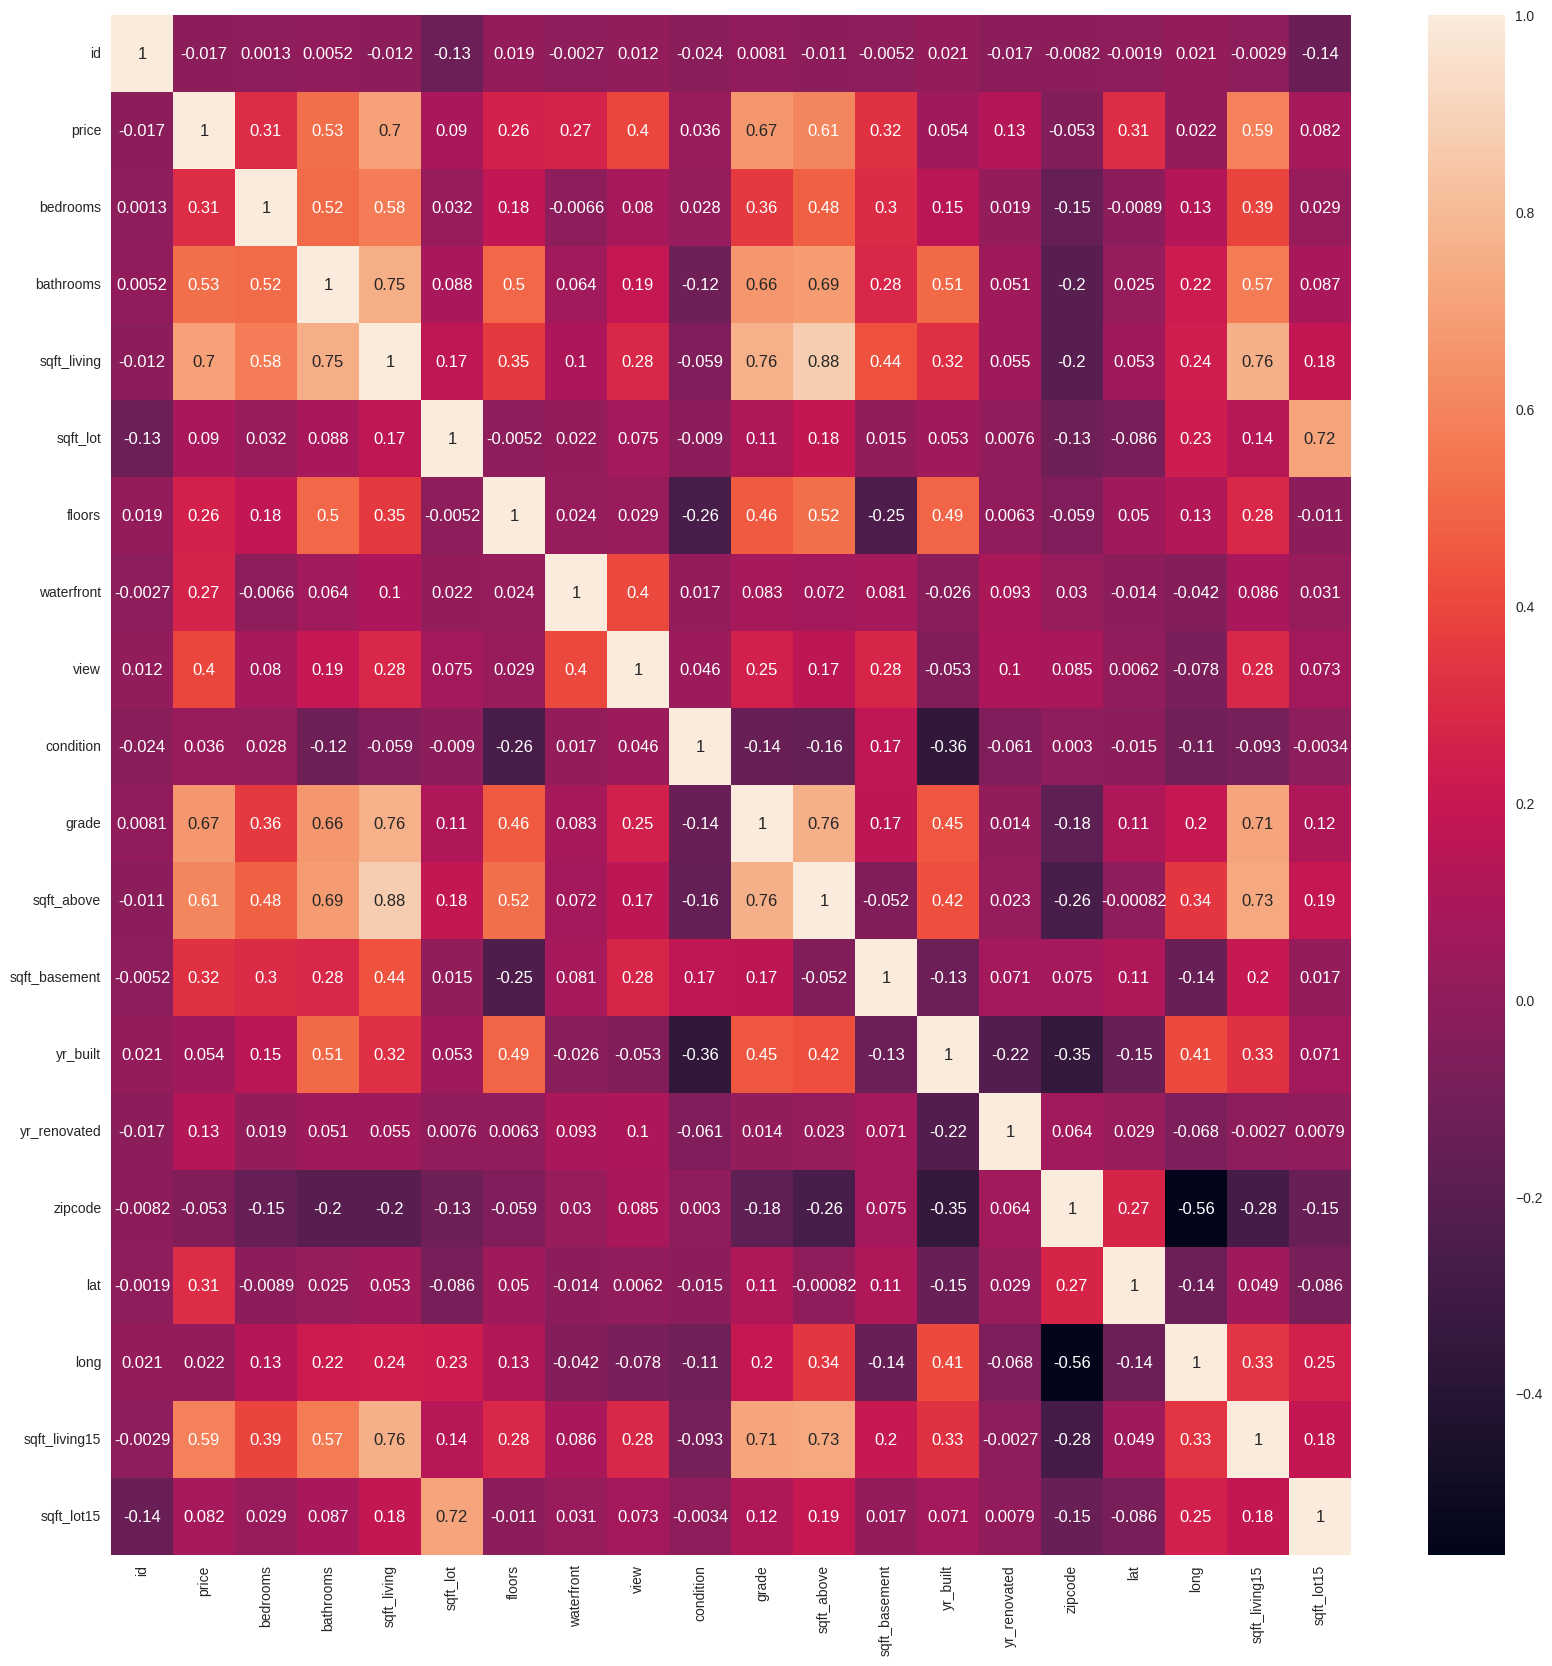

In [26]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True);

In [27]:
X_casas = base_casas.iloc[:,5:6].values
X_casas

array([[ 5650],
       [ 7242],
       [10000],
       ...,
       [ 1350],
       [ 2388],
       [ 1076]])

In [28]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([3, 3, 2, ..., 2, 3, 2])

In [29]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [30]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [31]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

In [32]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [33]:
# b0
regressor_simples_casas.intercept_

3.355183935781682

In [34]:
# b1
regressor_simples_casas.coef_

array([6.79426782e-07])

In [35]:
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.000920509971809147

In [36]:
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.0008220249628060339

In [37]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([3.36007581, 3.36015462, 3.35883857, ..., 3.36534137, 3.40727219,
       3.36621511])

In [39]:
grafico1 = px.scatter(x = X_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line(x = X_casas_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [40]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([3.35630499, 3.3904027 , 3.35769781, ..., 3.3726486 , 3.36062546,
       3.36146116])

In [41]:
y_casas_teste

array([2, 4, 2, ..., 3, 3, 3])

In [42]:
abs(y_casas_teste - previsoes_teste).mean()

0.7217139313807803

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mean_absolute_error(y_casas_teste, previsoes_teste)

0.7217139313807803

In [45]:
mean_squared_error(y_casas_teste, previsoes_teste)

0.8004859591383177

In [46]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

0.8946988091745276

In [47]:
grafico1 = px.scatter(x = X_casas_teste.ravel(), y = y_casas_teste)
grafico2 = px.line(x = X_casas_teste.ravel(), y = previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

# Regressão linear múltipla

## Base preço das casas - MAE 123.888, 0.68

In [48]:
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 1.00000e+00,  1.18000e+03,  5.65000e+03, ...,  4.75112e+01,
        -1.22257e+02,  1.34000e+03],
       [ 2.25000e+00,  2.57000e+03,  7.24200e+03, ...,  4.77210e+01,
        -1.22319e+02,  1.69000e+03],
       [ 1.00000e+00,  7.70000e+02,  1.00000e+04, ...,  4.77379e+01,
        -1.22233e+02,  2.72000e+03],
       ...,
       [ 7.50000e-01,  1.02000e+03,  1.35000e+03, ...,  4.75944e+01,
        -1.22299e+02,  1.02000e+03],
       [ 2.50000e+00,  1.60000e+03,  2.38800e+03, ...,  4.75345e+01,
        -1.22069e+02,  1.41000e+03],
       [ 7.50000e-01,  1.02000e+03,  1.07600e+03, ...,  4.75941e+01,
        -1.22299e+02,  1.02000e+03]])

In [49]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([3, 3, 2, ..., 2, 3, 2])

In [50]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [51]:
X_casas_treinamento.shape, X_casas_teste.shape

((15129, 16), (6484, 16))

In [52]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [53]:
regressor_multiplo_casas.intercept_

81.35599994951795

In [54]:
regressor_multiplo_casas.coef_

array([ 3.40168475e-01,  4.04400641e-04, -1.41708149e-06, -4.66608213e-02,
       -4.16007891e-01, -8.90480934e-02,  5.43724979e-02, -1.45010063e-01,
        1.83085357e-04,  2.21315284e-04, -2.30619947e-03, -5.20881810e-05,
       -7.92854871e-04, -1.73729715e-01, -9.58217567e-02, -1.94871400e-05])

In [56]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.3911299083979677

In [57]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.3985615256409738

In [58]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([2.70251894, 4.57515624, 2.77900062, ..., 3.65848588, 3.09187509,
       2.76556214])

In [59]:
y_casas_teste

array([2, 4, 2, ..., 3, 3, 3])

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

0.5275996524121869